# Анализ базы данных средствами SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

In [ ]:
 #импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine
from sqlalchemy import text


In [ ]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install --force-reinstall 'sqlalchemy<2.0.0'

In [ ]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# чтобы выполнить SQL-запрос, используем Pandas
query = '''SELECT * FROM books LIMIT 5'''

pd.io.sql.read_sql(sql=text(query), con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [ ]:
# заводим функцию для чтения
def read_sql(query):
    result = pd.io.sql.read_sql(query, con = engine)
    return result

In [ ]:
books = '''
           SELECT *
           FROM books 
           LIMIT 5
           '''
read_sql(books)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [ ]:
books_size = '''
           SELECT COUNT(*) as size 
           FROM books 
           LIMIT 5
           '''
read_sql(books_size)

,size
0,1000


Всего в таблице 1000 книг

In [ ]:
authors = '''
           SELECT *
           FROM authors 
           LIMIT 5
           '''
read_sql(authors)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

In [ ]:
ratings = '''
           SELECT *
           FROM ratings 
           LIMIT 5
           '''
read_sql(ratings)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [ ]:
reviews = '''
           SELECT *
           FROM reviews 
           LIMIT 5
           '''
read_sql(reviews)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [ ]:


publishers = '''
           SELECT *
           FROM publishers 
           LIMIT 5
           '''
read_sql(publishers)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

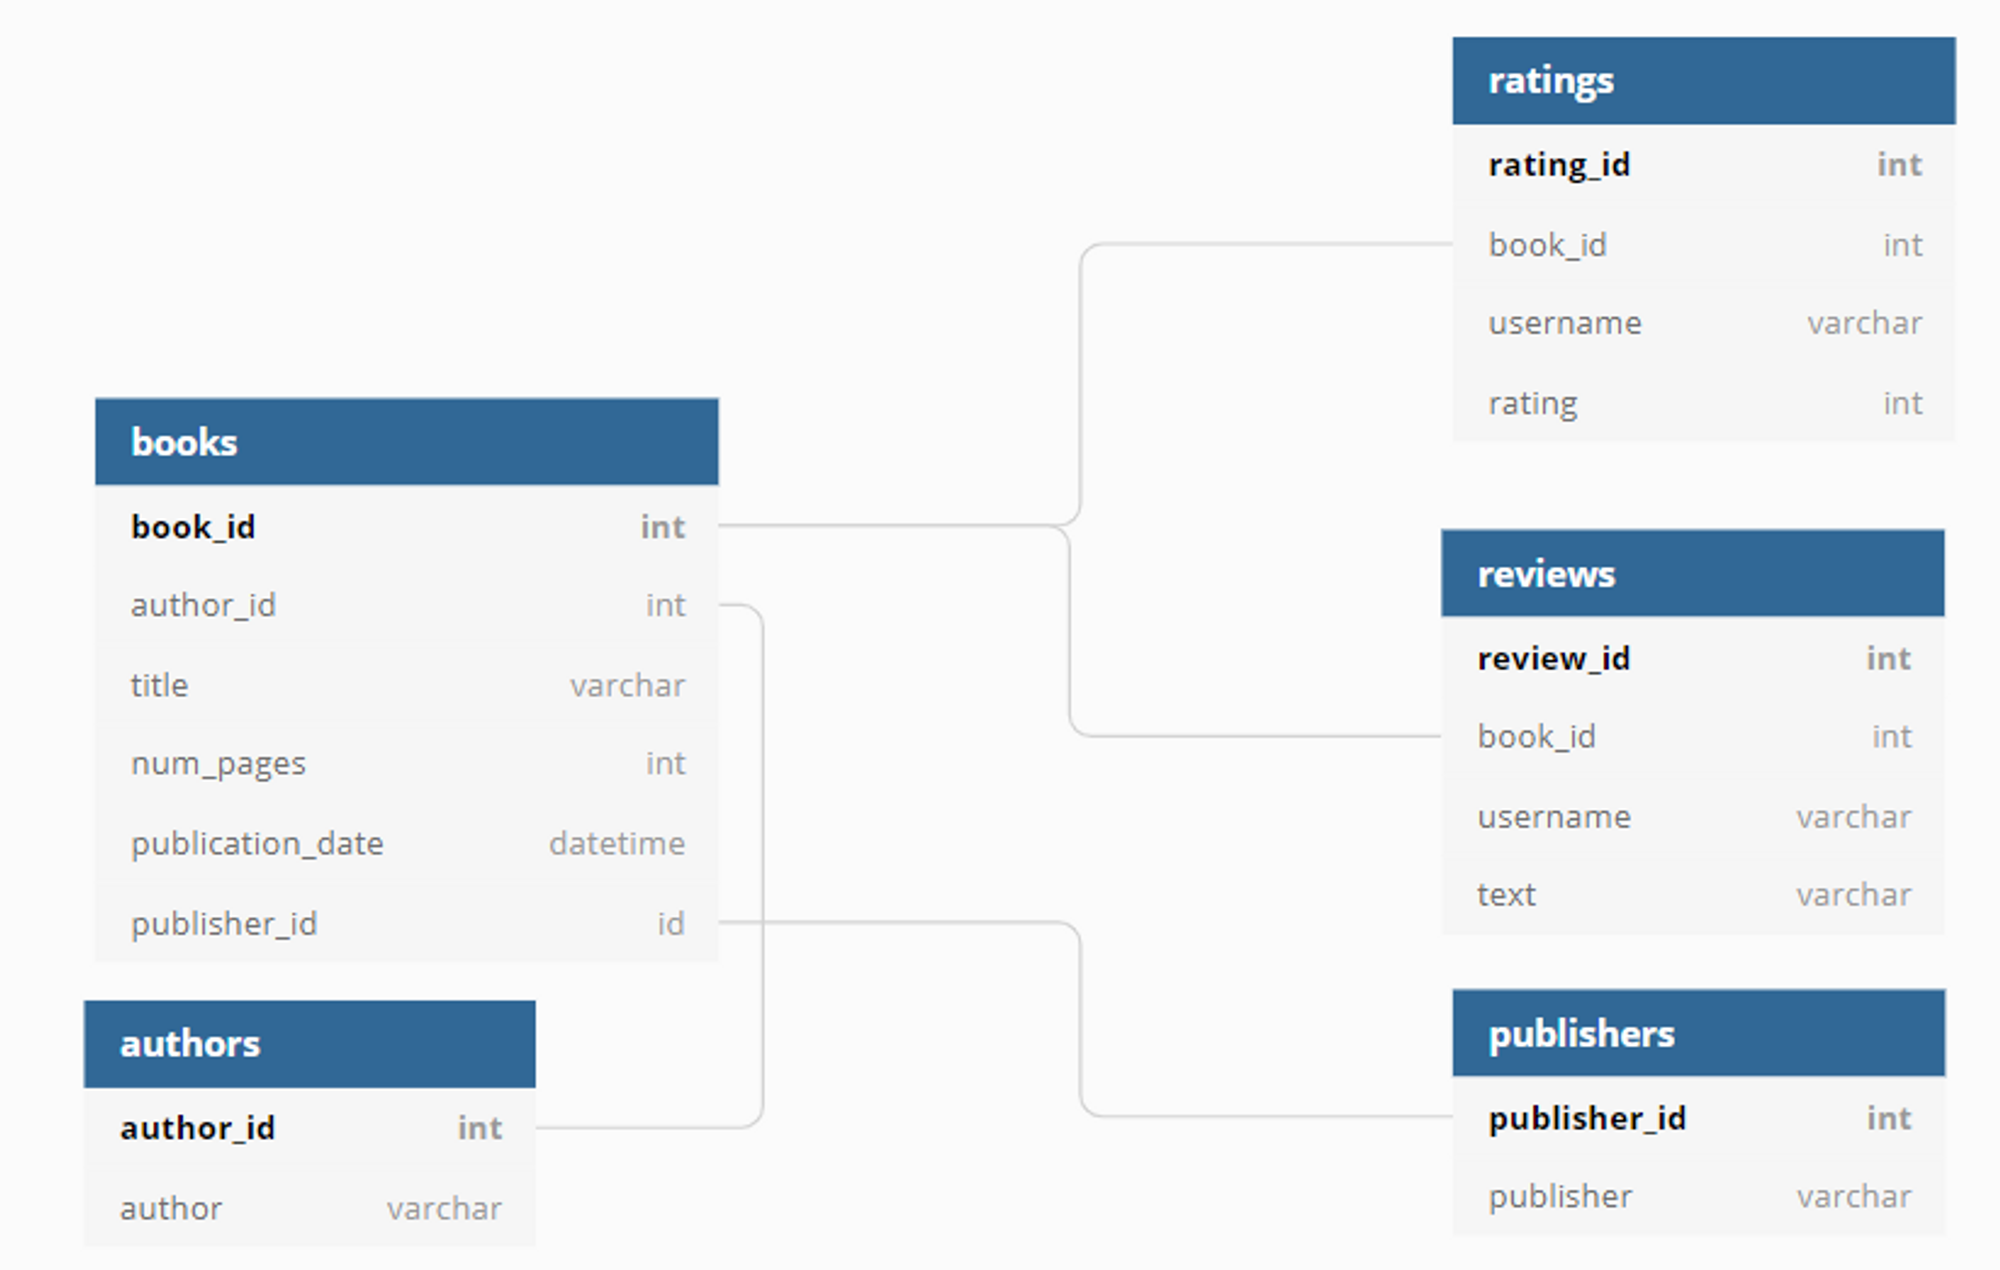

### Задания

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

## Посчитайте, сколько книг вышло после 1 января 2000 года;

In [ ]:
ttl_books_after010100 = '''
           SELECT COUNT(*) ttl_books_after010100
           FROM books
           WHERE  publication_date >= '01.01.2000'
           LIMIT 5
           '''
read_sql(ttl_books_after010100)

,ttl_books_after010100
0,821


После 01.01.2000 вышла 821 книга

## Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [ ]:
reviews__ratings =     '''
    WITH t AS
    (SELECT book_id, COUNT(review_id) review_count
    FROM reviews
    GROUP BY book_id), 

    tt AS
    (SELECT book_id, AVG(rating) avg_rating
    FROM ratings
    GROUP BY book_id)

    SELECT b.title, review_count, avg_rating
    FROM books b
    LEFT JOIN t ON b.book_id = t.book_id
    LEFT JOIN tt ON b.book_id = tt.book_id
    ORDER BY avg_rating DESC
    '''
read_sql(reviews__ratings)

,title,review_count,avg_rating
0,A Dirty Job (Grim Reaper #1),4.0,5.00
1,Tai-Pan (Asian Saga #2),2.0,5.00
2,School's Out—Forever (Maximum Ride #2),3.0,5.00
3,Piercing the Darkness (Darkness #2),2.0,5.00
4,The War of Art: Break Through the Blocks & Win...,2.0,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3.0,2.25
996,His Excellency: George Washington,2.0,2.00
997,Junky,2.0,2.00
998,Drowning Ruth,3.0,2.00


## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [ ]:
top_publ ='''     
    
    SELECT p.publisher,COUNT(book_id)
    FROM books b
    LEFT JOIN publishers p ON p.publisher_id = b.publisher_id
    WHERE num_pages >50
    GROUP BY p.publisher
    ORDER BY count DESC
    LIMIT 1
    '''
read_sql(top_publ)

,publisher,count
0,Penguin Books,42


Penguin Books - издательство,которое выпустило наибольшее число книг(толще 50 страниц)

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [ ]:
auth_top_rating ='''
    WITH r AS
    (SELECT book_id, AVG(rating)
    FROM ratings
    GROUP BY book_id)

    SELECT author, AVG(avg) avg_rating
    FROM
        (SELECT *
        FROM books
        WHERE book_id IN(
            SELECT book_id
            FROM
                (SELECT book_id, COUNT(rating_id) ratings_quantity
                FROM ratings
                GROUP BY book_id) t
                WHERE ratings_quantity >= 50)) tt
    LEFT JOIN r ON r.book_id = tt.book_id
    LEFT JOIN authors a ON a.author_id = tt.author_id
    GROUP BY author
    ORDER BY avg_rating DESC
    LIMIT 1
    '''
read_sql(auth_top_rating)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844


Автор, с самой высокой оценкой : Джоан Роулинг.

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [ ]:
AVG_rev_by_users =    '''
    SELECT ROUND(AVG(rev_count),1) AVG_rev_by_users
    FROM
        (SELECT username, COUNT(review_id) rev_count
        FROM reviews
        WHERE username IN(
            SELECT username
            FROM
                (SELECT username, COUNT(rating_id) rat_count
                FROM ratings
                GROUP BY username) r
            WHERE rat_count > 50)
        GROUP BY username) rt
    '''
read_sql(AVG_rev_by_users)

,avg_rev_by_users
0,24.3


Среднее кол-во обзоров от пользователей,которые поставили больше 50 оценок  - 24.3

# Вывод

- Начиная с 2000 года вышло 821 книг
- Больше всего книг выпустило издание Penguin Books
- Среди книг,которые получили больше 50 отзывов, наивыший рейтинг получила Джоан Роулинг
- Среднее кол-во обзоров от пользователей,которые поставили больше 50 оценок - 24.3